## Método de Crank-Nicholson


In [1]:
import numpy as np
from numpy import linalg
from numba import jit
# aplicando o Método

@jit(nopython=True)
def tridiagonal_matrix(n, below_diag, diag, upper_diag):
    # Criar arrays com os valores das diagonais
    below = np.full(n-1, below_diag)
    middle = np.full(n, diag)
    above = np.full(n-1, upper_diag)

    # Criar a matriz tridiagonal
    M = np.diag(below, k=-1) + np.diag(middle, k=0) + np.diag(above, k=1) # Hamiltoniano

    return M


@jit(nopython=True)
def Crank_Nicholson(u_init, num_passos_tempo, alpha):
    N = len(u_init)

    u = np.zeros((num_passos_tempo, N)) #inicializando nossa matriz dos dados, onde cada linha é um passo de tempo
    u[0] = u_init

    # coletando as matrizes tridiagonais
    A = tridiagonal_matrix(N-2, -alpha, (2 + 2*alpha), -alpha )
    B = tridiagonal_matrix(N-2, alpha, 2 - 2*alpha, alpha)

    A_inv = linalg.inv(A)
    # A cada iteração, o método calcula todas as posições do passo temporal seguinte (t + dt)
    for i in range(num_passos_tempo - 1):
      #print(A_inv.shape)
      #print(B.shape)
      #print(u[i][1:-1].shape)
      #print(np.zeros(N).shape)
      u[i+1][1:-1] = np.dot(A_inv, np.dot(B, u[i][1:-1]))   # extremidades fixadas em zero
    return u

In [78]:
#definindo a função de pulso triangular
def pulso_triangular(x: float, A: float=1.0, L:float = 1.0) -> float:
  if x <= L/2:
    return A*x / (L/2)
  elif x > L/2:
    return A*(1-(x/L)) / (1/2)

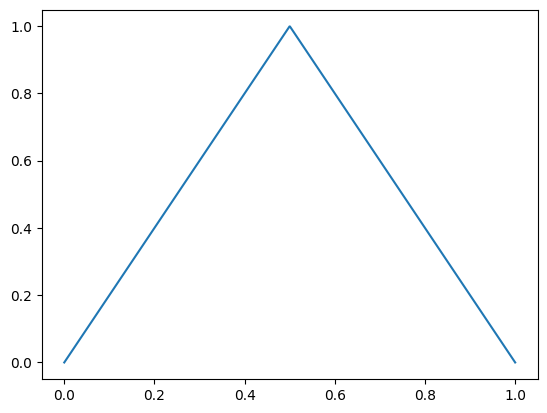

In [79]:
import numpy as np
import matplotlib.pyplot as plt

#condicoes iniciais
L = 1 #comprimento do pulso
A = 1 #pico de altura do pulso
D = 1.0 #constante de difusão

#definindo malha de pontos
x = np.linspace(0, L, 1000)

dt = 1e-3
dx = x[1] - x[0]
alpha = D*dt / pow(dx, 2)
num_passos_tempo = 4000
#definindo as posições em t=0
u_init = np.array([pulso_triangular(x_, A, L) for x_ in x])

plt.plot(x, u_init)

In [ ]:
u = Crank_Nicholson(u_init, num_passos_tempo, alpha)
u

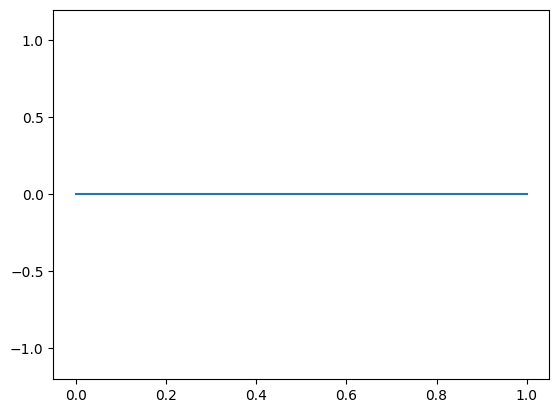

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Função para atualizar o gráfico a cada quadro da animação
def update_plot(i, data, line):
    line.set_ydata(data[i])
    return line,

# Configuração inicial do gráfico
fig, ax = plt.subplots()
line, = ax.plot(x, u[0])
ax.set_ylim(-1.2, 1.2)

# Criação da animação
ani = animation.FuncAnimation(fig, update_plot, frames=len(u), fargs=(u, line), interval=20)

# Salvar a animação em um arquivo de vídeo
# ani.save('animation.mp4', writer='ffmpeg')

# Mostrar o gráfico
plt.show()